In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
train_users_2= pd.read_csv('train_users_2.csv')
age_gender_bkts= pd.read_csv('age_gender_bkts.csv')
countries=pd.read_csv('countries.csv')

In [3]:
sessions=pd.read_csv('sessions.csv')

In [4]:
test_users= pd.read_csv('test_users.csv') ####### Test data

In [5]:
test_users.shape

(62096, 15)

In [6]:
train_users_2.shape

(213451, 16)

In [7]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [8]:
train_users_2.head(n=50)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [9]:
train_users_2.shape

(213451, 16)

In [10]:
#https://pandas.pydata.org/pandas-docs/stable/missing_data.html
#pd.isna(train_users_2['date_first_booking'])
#train_users_2['no_booking']=train_users_2['date_first_booking'].isna()  #### NOT USEFUL AS TEST DATA WILL NOT HAVE date_first_booking

In [11]:
#https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-from-pandas-datetime-column-python
train_users_2['create_month'] = pd.DatetimeIndex(train_users_2['date_account_created']).month
#train_users_2['booking_month'] = pd.DatetimeIndex(train_users_2['date_first_booking']).month

In [12]:
#https://pandas.pydata.org/pandas-docs/stable/missing_data.html
#test_users['no_booking']=test_users['date_first_booking'].isna()
#https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-from-pandas-datetime-column-python
test_users['create_month'] = pd.DatetimeIndex(test_users['date_account_created']).month
#test_users['booking_month'] = pd.DatetimeIndex(test_users['date_first_booking']).month

In [13]:
#train_users_2.replace(to_replace=np.NaN,value=0,inplace=True)

In [14]:
# time to first booking feature??

In [15]:
test_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,create_month
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,7
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,7
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,7
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE,7
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,7


In [16]:
train_users_2.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination', 'create_month'],
      dtype='object')

In [17]:
test_users.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'create_month'],
      dtype='object')

In [18]:
sessions_2=sessions.groupby(['user_id'],as_index=False).sum()

In [19]:
sessions_2.head()

,user_id,secs_elapsed
0,00023iyk9l,867896.0
1,0010k6l0om,586543.0
2,001wyh0pz8,282965.0
3,0028jgx1x1,297010.0
4,002qnbzfs5,6487080.0


In [20]:
sessions_2['id']=sessions_2['user_id']

In [21]:
sessions_2.drop(['user_id'],axis=1,inplace=True)

In [22]:
sessions_2.head()

,secs_elapsed,id
0,867896.0,00023iyk9l
1,586543.0,0010k6l0om
2,282965.0,001wyh0pz8
3,297010.0,0028jgx1x1
4,6487080.0,002qnbzfs5


In [23]:
train_users_2_sessions=pd.merge(train_users_2,sessions_2,how='left',on='id',sort=False)

In [24]:
train_users_2_sessions.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,create_month,secs_elapsed
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,6,NaN
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,5,NaN
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,9,NaN
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,12,NaN
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,9,NaN


In [25]:
test_users_sessions=pd.merge(test_users,sessions_2,how='left',on='id',sort=False)

In [26]:
test_users.shape

(62096, 16)

In [27]:
train_users_2_sessions.shape

(213451, 18)

In [28]:
test_users_sessions.shape

(62096, 17)

In [29]:
test_users_sessions.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,create_month,secs_elapsed
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,7,119187.0
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,7,250119.0
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,7,975575.0
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE,7,123001.0
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,7,454023.0


In [30]:
countries.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06


In [31]:
age_gender_bkts.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [32]:
train_users_2_sessions.shape

(213451, 18)

In [33]:
test_users_sessions.shape

(62096, 17)

In [34]:
#get dummies, form interactions, drop uninteresting columns, eliminate duplicate rows; then use in merging dataframes

In [35]:
age_gender_bkts.head(n=25)

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0
5,75-79,AU,male,298.0,2015.0
6,70-74,AU,male,415.0,2015.0
7,65-69,AU,male,574.0,2015.0
8,60-64,AU,male,636.0,2015.0
9,55-59,AU,male,714.0,2015.0


In [36]:
age_gender_bkts.replace(to_replace='0-4',value=2,inplace=True)
age_gender_bkts.replace(to_replace='5-9',value=7,inplace=True)
age_gender_bkts.replace(to_replace='10-14',value=12,inplace=True)
age_gender_bkts.replace(to_replace='15-19',value=17,inplace=True)
age_gender_bkts.replace(to_replace='20-24',value=22,inplace=True)
age_gender_bkts.replace(to_replace='25-29',value=27,inplace=True)
age_gender_bkts.replace(to_replace='30-34',value=32,inplace=True)
age_gender_bkts.replace(to_replace='35-39',value=37,inplace=True)
age_gender_bkts.replace(to_replace='40-44',value=42,inplace=True)
age_gender_bkts.replace(to_replace='45-49',value=47,inplace=True)
age_gender_bkts.replace(to_replace='50-54',value=52,inplace=True)
age_gender_bkts.replace(to_replace='55-59',value=57,inplace=True)
age_gender_bkts.replace(to_replace='60-64',value=62,inplace=True)
age_gender_bkts.replace(to_replace='65-69',value=67,inplace=True)
age_gender_bkts.replace(to_replace='70-74',value=72,inplace=True)
age_gender_bkts.replace(to_replace='75-79',value=77,inplace=True)
age_gender_bkts.replace(to_replace='80-84',value=82,inplace=True)
age_gender_bkts.replace(to_replace='85-89',value=87,inplace=True)
age_gender_bkts.replace(to_replace='90-94',value=92,inplace=True)
age_gender_bkts.replace(to_replace='95-99',value=97,inplace=True)
age_gender_bkts.replace(to_replace='100+',value=102,inplace=True)

In [37]:
#same_gender_age_distance=
#opp_gender_age_distance=
#country_dist
#lang_dist


In [38]:
countries_1=pd.get_dummies(countries,columns=['country_destination'])
age_gender_bkts_1=pd.get_dummies(age_gender_bkts,columns=['country_destination','gender'])

In [39]:
countries_1.columns

Index(['lat_destination', 'lng_destination', 'distance_km', 'destination_km2',
       'destination_language ', 'language_levenshtein_distance',
       'country_destination_AU', 'country_destination_CA',
       'country_destination_DE', 'country_destination_ES',
       'country_destination_FR', 'country_destination_GB',
       'country_destination_IT', 'country_destination_NL',
       'country_destination_PT', 'country_destination_US'],
      dtype='object')

In [40]:
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html
countries_1.drop(['destination_language '],axis=1,inplace=True) #Note: there is an extra space in the destination_language

In [41]:
countries_1.head()

,lat_destination,lng_destination,distance_km,destination_km2,language_levenshtein_distance,country_destination_AU,country_destination_CA,country_destination_DE,country_destination_ES,country_destination_FR,country_destination_GB,country_destination_IT,country_destination_NL,country_destination_PT,country_destination_US
0,-26.853388,133.275160,15297.7440,7741220.0,0.00,1,0,0,0,0,0,0,0,0,0
1,62.393303,-96.818146,2828.1333,9984670.0,0.00,0,1,0,0,0,0,0,0,0,0
2,51.165707,10.452764,7879.5680,357022.0,72.61,0,0,1,0,0,0,0,0,0,0
3,39.896027,-2.487694,7730.7240,505370.0,92.25,0,0,0,1,0,0,0,0,0,0
4,46.232193,2.209667,7682.9450,643801.0,92.06,0,0,0,0,1,0,0,0,0,0


In [42]:
countries_1.drop(['lat_destination','lng_destination'],axis=1,inplace=True)

In [43]:
countries_1.head()

,distance_km,destination_km2,language_levenshtein_distance,country_destination_AU,country_destination_CA,country_destination_DE,country_destination_ES,country_destination_FR,country_destination_GB,country_destination_IT,country_destination_NL,country_destination_PT,country_destination_US
0,15297.7440,7741220.0,0.00,1,0,0,0,0,0,0,0,0,0
1,2828.1333,9984670.0,0.00,0,1,0,0,0,0,0,0,0,0
2,7879.5680,357022.0,72.61,0,0,1,0,0,0,0,0,0,0
3,7730.7240,505370.0,92.25,0,0,0,1,0,0,0,0,0,0
4,7682.9450,643801.0,92.06,0,0,0,0,1,0,0,0,0,0


In [44]:
age_gender_bkts_1['agepop']=age_gender_bkts_1['age_bucket']*age_gender_bkts_1['population_in_thousands']

In [45]:
age_gender_bkts_2=age_gender_bkts_1.groupby(['country_destination_AU','country_destination_CA','country_destination_DE','country_destination_ES','country_destination_FR','country_destination_GB','country_destination_IT','country_destination_NL','country_destination_PT','country_destination_US','gender_female'],as_index=False).mean()

In [46]:
age_gender_bkts_2.head()

,country_destination_AU,country_destination_CA,country_destination_DE,country_destination_ES,country_destination_FR,country_destination_GB,country_destination_IT,country_destination_NL,country_destination_PT,country_destination_US,gender_female,age_bucket,population_in_thousands,year,gender_male,agepop
0,0,0,0,0,0,0,0,0,0,1,0,52,7622.809524,2015.0,1,282628.476190
1,0,0,0,0,0,0,0,0,0,1,1,52,7859.666667,2015.0,0,307761.714286
2,0,0,0,0,0,0,0,0,1,0,0,52,244.809524,2015.0,1,10022.000000
3,0,0,0,0,0,0,0,0,1,0,1,52,260.380952,2015.0,0,11427.190476
4,0,0,0,0,0,0,0,1,0,0,0,52,398.190476,2015.0,1,15923.523810


In [47]:
age_gender_bkts_2['wtage']=age_gender_bkts_2['agepop']/age_gender_bkts_2['population_in_thousands'] #21 brackets for both numerator and denominator

In [48]:
age_gender_bkts_2.drop(['age_bucket','population_in_thousands','year','agepop'],axis=1,inplace=True)

In [49]:
age_gender_bkts_2.head()

,country_destination_AU,country_destination_CA,country_destination_DE,country_destination_ES,country_destination_FR,country_destination_GB,country_destination_IT,country_destination_NL,country_destination_PT,country_destination_US,gender_female,gender_male,wtage
0,0,0,0,0,0,0,0,0,0,1,0,1,37.076681
1,0,0,0,0,0,0,0,0,0,1,1,0,39.157095
2,0,0,0,0,0,0,0,0,1,0,0,1,40.937950
3,0,0,0,0,0,0,0,0,1,0,1,0,43.886430
4,0,0,0,0,0,0,0,1,0,0,0,1,39.989715


In [50]:
country_age_gender=pd.merge(countries_1,age_gender_bkts_2,on=['country_destination_AU','country_destination_CA','country_destination_DE','country_destination_ES','country_destination_FR','country_destination_GB','country_destination_IT','country_destination_NL','country_destination_PT','country_destination_US'],sort=False)

In [51]:
country_age_gender.head()

,distance_km,destination_km2,language_levenshtein_distance,country_destination_AU,country_destination_CA,country_destination_DE,country_destination_ES,country_destination_FR,country_destination_GB,country_destination_IT,country_destination_NL,country_destination_PT,country_destination_US,gender_female,gender_male,wtage
0,15297.7440,7741220.0,0.00,1,0,0,0,0,0,0,0,0,0,0,1,37.293302
1,15297.7440,7741220.0,0.00,1,0,0,0,0,0,0,0,0,0,1,0,38.867931
2,2828.1333,9984670.0,0.00,0,1,0,0,0,0,0,0,0,0,0,1,39.174389
3,2828.1333,9984670.0,0.00,0,1,0,0,0,0,0,0,0,0,1,0,40.966014
4,7879.5680,357022.0,72.61,0,0,1,0,0,0,0,0,0,0,0,1,42.917910


In [52]:
country_age_gender1=country_age_gender
country_age_gender1['dist_AU']=country_age_gender['distance_km']*country_age_gender['country_destination_AU']
country_age_gender1['dist2_AU']=country_age_gender['destination_km2']*country_age_gender['country_destination_AU']
country_age_gender1['lang_dist_AU']=country_age_gender['language_levenshtein_distance']*country_age_gender['country_destination_AU']



country_age_gender1['dist_CA']=country_age_gender['distance_km']*country_age_gender['country_destination_CA']
country_age_gender1['dist2_CA']=country_age_gender['destination_km2']*country_age_gender['country_destination_CA']
country_age_gender1['lang_dist_CA']=country_age_gender['language_levenshtein_distance']*country_age_gender['country_destination_CA']




country_age_gender1['dist_DE']=country_age_gender['distance_km']*country_age_gender['country_destination_DE']
country_age_gender1['dist2_DE']=country_age_gender['destination_km2']*country_age_gender['country_destination_DE']
country_age_gender1['lang_dist_DE']=country_age_gender['language_levenshtein_distance']*country_age_gender['country_destination_DE']



country_age_gender1['dist_ES']=country_age_gender['distance_km']*country_age_gender['country_destination_ES']
country_age_gender1['dist2_ES']=country_age_gender['destination_km2']*country_age_gender['country_destination_ES']
country_age_gender1['lang_dist_ES']=country_age_gender['language_levenshtein_distance']*country_age_gender['country_destination_ES']




country_age_gender1['dist_FR']=country_age_gender['distance_km']*country_age_gender['country_destination_FR']
country_age_gender1['dist2_FR']=country_age_gender['destination_km2']*country_age_gender['country_destination_FR']
country_age_gender1['lang_dist_FR']=country_age_gender['language_levenshtein_distance']*country_age_gender['country_destination_FR']


country_age_gender1['dist_GB']=country_age_gender['distance_km']*country_age_gender['country_destination_GB']
country_age_gender1['dist2_GB']=country_age_gender['destination_km2']*country_age_gender['country_destination_GB']
country_age_gender1['lang_dist_GB']=country_age_gender['language_levenshtein_distance']*country_age_gender['country_destination_GB']



country_age_gender1['dist_IT']=country_age_gender['distance_km']*country_age_gender['country_destination_IT']
country_age_gender1['dist2_IT']=country_age_gender['destination_km2']*country_age_gender['country_destination_IT']
country_age_gender1['lang_dist_IT']=country_age_gender['language_levenshtein_distance']*country_age_gender['country_destination_IT']


country_age_gender1['dist_NL']=country_age_gender['distance_km']*country_age_gender['country_destination_NL']
country_age_gender1['dist2_NL']=country_age_gender['destination_km2']*country_age_gender['country_destination_NL']
country_age_gender1['lang_dist_NL']=country_age_gender['language_levenshtein_distance']*country_age_gender['country_destination_NL']


country_age_gender1['dist_PT']=country_age_gender['distance_km']*country_age_gender['country_destination_PT']
country_age_gender1['dist2_PT']=country_age_gender['destination_km2']*country_age_gender['country_destination_PT']
country_age_gender1['lang_dist_PT']=country_age_gender['language_levenshtein_distance']*country_age_gender['country_destination_PT']


country_age_gender1['dist_US']=country_age_gender['distance_km']*country_age_gender['country_destination_US']
country_age_gender1['dist2_US']=country_age_gender['destination_km2']*country_age_gender['country_destination_US']
country_age_gender1['lang_dist_US']=country_age_gender['language_levenshtein_distance']*country_age_gender['country_destination_US']


country_age_gender1['male_wtage_AU']=country_age_gender['gender_male']*country_age_gender['country_destination_AU']*country_age_gender['wtage']
country_age_gender1['male_wtage_CA']=country_age_gender['gender_male']*country_age_gender['country_destination_CA']*country_age_gender['wtage']
country_age_gender1['male_wtage_DE']=country_age_gender['gender_male']*country_age_gender['country_destination_DE']*country_age_gender['wtage']
country_age_gender1['male_wtage_ES']=country_age_gender['gender_male']*country_age_gender['country_destination_ES']*country_age_gender['wtage']
country_age_gender1['male_wtage_FR']=country_age_gender['gender_male']*country_age_gender['country_destination_FR']*country_age_gender['wtage']
country_age_gender1['male_wtage_GB']=country_age_gender['gender_male']*country_age_gender['country_destination_GB']*country_age_gender['wtage']
country_age_gender1['male_wtage_IT']=country_age_gender['gender_male']*country_age_gender['country_destination_IT']*country_age_gender['wtage']
country_age_gender1['male_wtage_NL']=country_age_gender['gender_male']*country_age_gender['country_destination_NL']*country_age_gender['wtage']
country_age_gender1['male_wtage_PT']=country_age_gender['gender_male']*country_age_gender['country_destination_PT']*country_age_gender['wtage']
country_age_gender1['male_wtage_US']=country_age_gender['gender_male']*country_age_gender['country_destination_US']*country_age_gender['wtage']


country_age_gender1['female_wtage_AU']=country_age_gender['gender_female']*country_age_gender['country_destination_AU']*country_age_gender['wtage']
country_age_gender1['female_wtage_CA']=country_age_gender['gender_female']*country_age_gender['country_destination_CA']*country_age_gender['wtage']
country_age_gender1['female_wtage_DE']=country_age_gender['gender_female']*country_age_gender['country_destination_DE']*country_age_gender['wtage']
country_age_gender1['female_wtage_ES']=country_age_gender['gender_female']*country_age_gender['country_destination_ES']*country_age_gender['wtage']
country_age_gender1['female_wtage_FR']=country_age_gender['gender_female']*country_age_gender['country_destination_FR']*country_age_gender['wtage']
country_age_gender1['female_wtage_GB']=country_age_gender['gender_female']*country_age_gender['country_destination_GB']*country_age_gender['wtage']
country_age_gender1['female_wtage_IT']=country_age_gender['gender_female']*country_age_gender['country_destination_IT']*country_age_gender['wtage']
country_age_gender1['female_wtage_NL']=country_age_gender['gender_female']*country_age_gender['country_destination_NL']*country_age_gender['wtage']
country_age_gender1['female_wtage_PT']=country_age_gender['gender_female']*country_age_gender['country_destination_PT']*country_age_gender['wtage']
country_age_gender1['female_wtage_US']=country_age_gender['gender_female']*country_age_gender['country_destination_US']*country_age_gender['wtage']

In [53]:
country_age_gender1.drop(['distance_km', 'destination_km2', 'language_levenshtein_distance',
       'country_destination_AU', 'country_destination_CA',
       'country_destination_DE', 'country_destination_ES',
       'country_destination_FR', 'country_destination_GB',
       'country_destination_IT', 'country_destination_NL',
       'country_destination_PT', 'country_destination_US', 'gender_female','gender_male',
       'wtage'],axis=1,inplace=True)

In [54]:
country_age_gender1.shape

(20, 50)

In [55]:
country_age_gender1.head()

,dist_AU,dist2_AU,lang_dist_AU,dist_CA,dist2_CA,lang_dist_CA,dist_DE,dist2_DE,lang_dist_DE,dist_ES,...,female_wtage_AU,female_wtage_CA,female_wtage_DE,female_wtage_ES,female_wtage_FR,female_wtage_GB,female_wtage_IT,female_wtage_NL,female_wtage_PT,female_wtage_US
0,15297.744,7741220.0,0.0,0.0000,0.0,0.0,0.000,0.0,0.00,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15297.744,7741220.0,0.0,0.0000,0.0,0.0,0.000,0.0,0.00,0.0,...,38.867931,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000,0.0,0.0,2828.1333,9984670.0,0.0,0.000,0.0,0.00,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000,0.0,0.0,2828.1333,9984670.0,0.0,0.000,0.0,0.00,0.0,...,0.000000,40.966014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000,0.0,0.0,0.0000,0.0,0.0,7879.568,357022.0,72.61,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.append.html
country_age_gender2=country_age_gender1
country_age_gender2.sum()
country_age_gender2.columns
country_age_gender3=country_age_gender2.append(country_age_gender2.sum(),ignore_index=True)

In [57]:
#https://stackoverflow.com/questions/14661701/how-to-drop-a-list-of-rows-from-pandas-dataframe
country_age_gender3
country_age_gender3.drop(country_age_gender3.index[[i for i in range(20)]])

,dist_AU,dist2_AU,lang_dist_AU,dist_CA,dist2_CA,lang_dist_CA,dist_DE,dist2_DE,lang_dist_DE,dist_ES,...,female_wtage_AU,female_wtage_CA,female_wtage_DE,female_wtage_ES,female_wtage_FR,female_wtage_GB,female_wtage_IT,female_wtage_NL,female_wtage_PT,female_wtage_US
20,30595.488,15482440.0,0.0,5656.2666,19969340.0,0.0,15759.136,714044.0,145.22,15461.448,...,38.867931,40.966014,45.466676,43.165689,42.063297,41.199103,45.302022,41.843271,43.88643,39.157095


In [58]:
#http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [59]:
#https://stackoverflow.com/questions/36875648/copy-pandas-dataframe-row-to-multiple-other-rows
country_age_gender3.loc[:20,:] = country_age_gender3.loc[20].values
country_age_gender4=country_age_gender3.drop(country_age_gender3.index[[i for i in range(1,21)]])

In [60]:
country_age_gender4

,dist_AU,dist2_AU,lang_dist_AU,dist_CA,dist2_CA,lang_dist_CA,dist_DE,dist2_DE,lang_dist_DE,dist_ES,...,female_wtage_AU,female_wtage_CA,female_wtage_DE,female_wtage_ES,female_wtage_FR,female_wtage_GB,female_wtage_IT,female_wtage_NL,female_wtage_PT,female_wtage_US
0,30595.488,15482440.0,0.0,5656.2666,19969340.0,0.0,15759.136,714044.0,145.22,15461.448,...,38.867931,40.966014,45.466676,43.165689,42.063297,41.199103,45.302022,41.843271,43.88643,39.157095


In [61]:
train_users_2_sessions.shape

(213451, 18)

In [62]:
test_users_sessions.shape

(62096, 17)

In [63]:
test_users_sessions.shape[0]

62096

In [64]:
country_age_gender4['dist_AU'][0]

30595.487999999998

In [65]:
for col in country_age_gender4.columns:
    train_users_2_sessions[col]=country_age_gender4[col]

In [66]:
#train_users_2_sessions['dist_AU']

In [67]:
for col in country_age_gender4.columns:
    test_users_sessions[col]=country_age_gender4[col]

In [68]:
#https://stackoverflow.com/questions/44723183/set-value-to-an-entire-column-of-a-pandas-dataframe
for col in country_age_gender4.columns:
    k=train_users_2_sessions[col][0]
    train_users_2_sessions.loc[:,col] = k
    test_users_sessions.loc[:,col] = k


In [69]:
train_users_2_sessions.shape

(213451, 68)

In [70]:
test_users_sessions.shape

(62096, 67)

In [71]:
train_users_2_sessions.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,female_wtage_AU,female_wtage_CA,female_wtage_DE,female_wtage_ES,female_wtage_FR,female_wtage_GB,female_wtage_IT,female_wtage_NL,female_wtage_PT,female_wtage_US
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,...,38.867931,40.966014,45.466676,43.165689,42.063297,41.199103,45.302022,41.843271,43.88643,39.157095
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,...,38.867931,40.966014,45.466676,43.165689,42.063297,41.199103,45.302022,41.843271,43.88643,39.157095
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,38.867931,40.966014,45.466676,43.165689,42.063297,41.199103,45.302022,41.843271,43.88643,39.157095
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,...,38.867931,40.966014,45.466676,43.165689,42.063297,41.199103,45.302022,41.843271,43.88643,39.157095
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,...,38.867931,40.966014,45.466676,43.165689,42.063297,41.199103,45.302022,41.843271,43.88643,39.157095


In [72]:
test_users_sessions.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,female_wtage_AU,female_wtage_CA,female_wtage_DE,female_wtage_ES,female_wtage_FR,female_wtage_GB,female_wtage_IT,female_wtage_NL,female_wtage_PT,female_wtage_US
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,...,38.867931,40.966014,45.466676,43.165689,42.063297,41.199103,45.302022,41.843271,43.88643,39.157095
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,...,38.867931,40.966014,45.466676,43.165689,42.063297,41.199103,45.302022,41.843271,43.88643,39.157095
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,...,38.867931,40.966014,45.466676,43.165689,42.063297,41.199103,45.302022,41.843271,43.88643,39.157095
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,...,38.867931,40.966014,45.466676,43.165689,42.063297,41.199103,45.302022,41.843271,43.88643,39.157095
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,...,38.867931,40.966014,45.466676,43.165689,42.063297,41.199103,45.302022,41.843271,43.88643,39.157095


In [73]:
test_users_sessions.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'create_month', 'secs_elapsed', 'dist_AU', 'dist2_AU',
       'lang_dist_AU', 'dist_CA', 'dist2_CA', 'lang_dist_CA', 'dist_DE',
       'dist2_DE', 'lang_dist_DE', 'dist_ES', 'dist2_ES', 'lang_dist_ES',
       'dist_FR', 'dist2_FR', 'lang_dist_FR', 'dist_GB', 'dist2_GB',
       'lang_dist_GB', 'dist_IT', 'dist2_IT', 'lang_dist_IT', 'dist_NL',
       'dist2_NL', 'lang_dist_NL', 'dist_PT', 'dist2_PT', 'lang_dist_PT',
       'dist_US', 'dist2_US', 'lang_dist_US', 'male_wtage_AU', 'male_wtage_CA',
       'male_wtage_DE', 'male_wtage_ES', 'male_wtage_FR', 'male_wtage_GB',
       'male_wtage_IT', 'male_wtage_NL', 'male_wtage_PT', 'male_wtage_US',
       'female_wtage_AU', 'female_wtage_CA', 'female_wta

In [74]:
train_users_2_sessions_2=pd.get_dummies(train_users_2_sessions,columns=['signup_method','language','affiliate_provider','signup_app','gender'])
test_users_sessions_2=pd.get_dummies(test_users_sessions,columns=['signup_method','language','affiliate_provider','signup_app','gender'])

In [75]:
train_users_2_sessions_2.shape

(213451, 117)

In [76]:
test_users_sessions_2.shape

(62096, 115)

In [77]:
#test_users_sessions_3=test_users_sessions_2

In [78]:
#test_users_sessions_3.drop(train_users_2_sessions_2.columns,axis=1,inplace=True)

In [79]:
#train_users_2_sessions_3=train_users_2_sessions_2

In [80]:
#train_users_2_sessions_3.drop(test_users_sessions_2.columns,axis=1,inplace=True)

In [81]:
#based on above analysis the following dissimilar columns exist:
#'signup_method_weibo' 'language_-unknown-' 
#'language_hr' 'language_is' 'affiliate_provider_wayn'
# 'country_destination' is an expected differnce and so not mentioned above
#There differences have been introduced during dummy variable column generation

In [82]:
#train_users_2_sessions_2['language_hr']

In [83]:
train_users_2_sessions_2.drop(['language_hr','language_is','affiliate_provider_wayn'],axis=1,inplace=True)
test_users_sessions_2.drop(['signup_method_weibo','language_-unknown-' ],axis=1,inplace=True)

In [84]:
train_users_2_sessions_2.shape

(213451, 114)

In [85]:
test_users_sessions_2.shape

(62096, 113)

In [86]:
train_users_2_sessions_2.drop(['gender_-unknown-','gender_MALE','gender_OTHER'],axis=1,inplace=True) ####CHECK LATER
test_users_sessions_2.drop(['gender_-unknown-','gender_MALE','gender_OTHER'],axis=1,inplace=True) ####CHECK LATER

In [87]:
train_users_2_sessions_2.drop(['date_account_created','date_first_booking'],axis=1,inplace=True)####CHECK LATER
test_users_sessions_2.drop(['date_account_created','date_first_booking'],axis=1,inplace=True)####CHECK LATER

In [88]:
#https://stackoverflow.com/questions/17134716/convert-dataframe-column-type-from-string-to-datetime
#train_all2['date_account_created'] = pd.to_datetime(train_all2['date_account_created'])
#train_all2['timestamp_first_active'] = pd.to_datetime(train_all2['timestamp_first_active'])
#train_all2['date_first_booking'] = pd.to_datetime(train_all2['date_first_booking'])

In [89]:
#train_all2['date_account_created']=train_all2.'date_account_created.to_pydatetime()
#train_all2['time_to_first_booking']=train_all2['date_first_booking']-train_all2['date_account_created']

In [90]:
train_users_2_sessions_2.columns

Index(['id', 'timestamp_first_active', 'age', 'signup_flow',
       'affiliate_channel', 'first_affiliate_tracked', 'first_device_type',
       'first_browser', 'country_destination', 'create_month',
       ...
       'affiliate_provider_other', 'affiliate_provider_padmapper',
       'affiliate_provider_vast', 'affiliate_provider_yahoo',
       'affiliate_provider_yandex', 'signup_app_Android', 'signup_app_Moweb',
       'signup_app_Web', 'signup_app_iOS', 'gender_FEMALE'],
      dtype='object', length=109)

In [91]:
labels = train_users_2_sessions_2['country_destination'].values

In [92]:
train_users_2_sessions_2.shape

(213451, 109)

In [93]:
test_users_sessions_2.shape

(62096, 108)

In [94]:
train_users_2_sessions_2.drop(['country_destination'],axis=1,inplace=True)

In [95]:
#train_users_2_sessions_2['create_month'].replace(to_replace=np.NaN,value=12,inplace=True) # Imputer parameters modified; here only the month is specified as December in case not available for one column
train_users_2_sessions_2.replace(to_replace=np.NaN,value=0,inplace=True)

In [96]:
#test_users_sessions_2['create_month'].replace(to_replace=np.NaN,value=12,inplace=True)  # Imputer parameters modified; here only the month is specified as December in case not available for one column
test_users_sessions_2.replace(to_replace=np.NaN,value=0,inplace=True)

In [97]:
test_users_sessions_2.columns

Index(['id', 'timestamp_first_active', 'age', 'signup_flow',
       'affiliate_channel', 'first_affiliate_tracked', 'first_device_type',
       'first_browser', 'create_month', 'secs_elapsed',
       ...
       'affiliate_provider_other', 'affiliate_provider_padmapper',
       'affiliate_provider_vast', 'affiliate_provider_yahoo',
       'affiliate_provider_yandex', 'signup_app_Android', 'signup_app_Moweb',
       'signup_app_Web', 'signup_app_iOS', 'gender_FEMALE'],
      dtype='object', length=108)

In [98]:
train_users_2_sessions_2.drop(['id','timestamp_first_active','signup_flow',
       'affiliate_channel', 'first_affiliate_tracked', 'first_device_type',
       'first_browser'],axis=1,inplace=True)
test_users_sessions_2.drop(['id','timestamp_first_active','signup_flow',
       'affiliate_channel', 'first_affiliate_tracked', 'first_device_type',
       'first_browser'],axis=1,inplace=True)

In [99]:
data = train_users_2_sessions_2.values

In [100]:
data

array([[0.00000e+00, 6.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [3.80000e+01, 5.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [5.60000e+01, 9.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.00000e+00],
       ...,
       [3.20000e+01, 6.00000e+00, 3.42982e+05, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 6.00000e+00, 3.41609e+05, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [0.00000e+00, 6.00000e+00, 2.75921e+06, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00]])

In [101]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, train_size=0.8, random_state=0)# stratify=y gives an error

C:\Users\agodbole\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [102]:
from sklearn.preprocessing import Imputer
imp = Imputer()
#imp = Imputer(missing_values='NaN',strategy='median',axis=0)
imp.fit(train_data)
train_data_finite = imp.transform(train_data)
test_data_finite = imp.transform(test_data) 

from sklearn.preprocessing import StandardScaler  ### what does this do to dummy variables??? CHECK
scaler = StandardScaler()
scaler.fit(train_data_finite)
train_scaled = scaler.transform(train_data_finite)
test_scaled = scaler.transform(test_data_finite)

In [103]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(train_scaled)
X_pca = pca.transform(train_scaled)

In [104]:
X_pca.shape

(170760, 101)

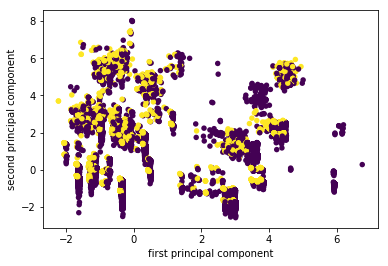

In [104]:
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
y = train_scaled[:, 1] > 0 #coloring is based on column 1 !!!
#y=train_labels ### This is not numeric...labels can be encoded for the colors but then numerically encoded labels 
#will have to be considered along with the training data (that currently excludes lables!)

plt.scatter(X_pca[:, 0], X_pca[:, 1],c=y,linewidths=0, s=30)
plt.xlabel("first principal component")
plt.ylabel("second principal component");
#plt.zlabel("third principal component");

In [105]:
pca.explained_variance_

array([2.30039634e+00, 2.26804470e+00, 1.95700872e+00, 1.70941507e+00,
       1.32824103e+00, 1.27346355e+00, 1.19776296e+00, 1.17298663e+00,
       1.12923503e+00, 1.06934745e+00, 1.04040310e+00, 1.03793546e+00,
       1.02645568e+00, 1.01705528e+00, 1.01342700e+00, 1.01113632e+00,
       1.00976658e+00, 1.00804150e+00, 1.00686134e+00, 1.00447975e+00,
       1.00171415e+00, 1.00130622e+00, 1.00088579e+00, 1.00068747e+00,
       1.00043294e+00, 1.00031149e+00, 1.00017562e+00, 1.00008170e+00,
       1.00006999e+00, 9.99898190e-01, 9.99494826e-01, 9.98738782e-01,
       9.98452154e-01, 9.95654134e-01, 9.94324936e-01, 9.91365171e-01,
       9.90234368e-01, 9.87325503e-01, 9.81431286e-01, 9.67467887e-01,
       8.60522270e-01, 8.48356307e-01, 8.29651495e-01, 8.11273599e-01,
       7.99593129e-01, 7.26792333e-01, 6.32068083e-01, 4.46999605e-04,
       7.83662236e-05, 2.28015052e-30, 7.89872322e-31, 6.31909670e-31,
       3.69116034e-31, 3.32371440e-31, 3.11798926e-31, 2.50691186e-31,
      

In [106]:
#http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA(n_components=11)
train_lda=lda.fit_transform(train_scaled,train_labels)

C:\Users\agodbole\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\agodbole\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [107]:
test_lda=lda.transform(test_scaled)

In [108]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier('most_frequent')
clf.fit(train_data_finite, train_labels)
print("Prediction accuracy: %f" % clf.score(test_scaled, test_labels))

Prediction accuracy: 0.586728


In [109]:
#http://scikit-learn.org/stable/modules/neural_networks_supervised.html

from sklearn.neural_network import MLPClassifier

In [111]:
train_pca = pca.transform(train_scaled)
test_pca = pca.transform(test_scaled)

In [130]:
mlp = MLPClassifier(solver='sgd', alpha=0.0001,hidden_layer_sizes=(5,5,5), activation='relu', learning_rate_init=0.1,random_state=1)
#mlp.fit(train_data_finite, train_labels ) 
#print("Prediction accuracy: %f" % mlp.score(test_data_finite, test_labels))

mlp.fit(train_pca, train_labels ) 
print("Prediction accuracy: %f" % mlp.score(test_pca, test_labels))

Prediction accuracy: 0.627556


In [128]:
#http://scikit-learn.org/stable/modules/ensemble.html#random-forests
from sklearn.ensemble import RandomForestClassifier


In [129]:
rf_pca = RandomForestClassifier(n_estimators=100)
rf_pca.fit(train_pca, train_labels)
print("Prediction accuracy: %f" % rf_pca.score(test_pca, test_labels))

Prediction accuracy: 0.584807


In [114]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


knn_lda = KNeighborsClassifier(n_neighbors=50)
#classifier = KNeighborsClassifier()
#classifier.fit(train_data_finite, train_labels)
#print("Prediction accuracy: %f" % classifier.score(test_data_finite, test_labels))
knn_lda.fit(train_lda, train_labels)
print("Prediction accuracy: %f" % knn_lda.score(test_lda, test_labels))

Prediction accuracy: 0.623808


In [115]:
#http://scikit-learn.org/stable/modules/ensemble.html#random-forests
from sklearn.ensemble import RandomForestClassifier

rf_lda = RandomForestClassifier()
rf_lda.fit(train_lda, train_labels)
print("Prediction accuracy: %f" % rf_lda.score(test_lda, test_labels))

Prediction accuracy: 0.580614


In [116]:
from sklearn.linear_model import LogisticRegression

train_pca = pca.transform(train_scaled)
test_pca = pca.transform(test_scaled)

lr_lda = LogisticRegression()
#lr.fit(train_data_finite, train_labels)
#print("Prediction accuracy: %f" % lr.score(test_data_finite, test_labels))
lr_lda.fit(train_lda, train_labels)
print("Prediction accuracy: %f" % lr_lda.score(test_lda, test_labels))

Prediction accuracy: 0.588625


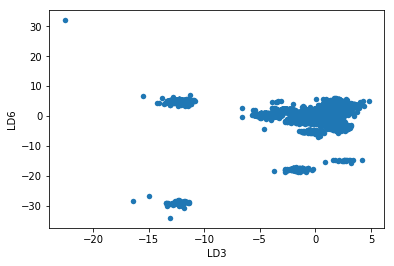

In [117]:
#plot_decision_regions(train_lda,train_labels,classifier=lr_lda)
plt.scatter(train_lda[:, 3], train_lda[:, 6],linewidths=0, s=30)
plt.xlabel('LD3')
plt.ylabel('LD6')
#plt.legend()
plt.show()

In [118]:
#http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA(n_components=11)
train_pca_lda=lda.fit_transform(train_pca[:,:11],train_labels)
test_pca_lda=lda.transform(test_pca[:,:11])

C:\Users\agodbole\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


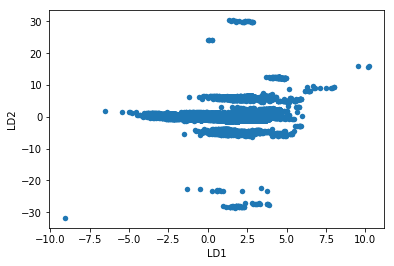

In [119]:
#plot_decision_regions(train_lda,train_labels,classifier=lr_lda)
plt.scatter(train_pca_lda[:, 0], train_pca_lda[:,9],linewidths=0, s=30)
plt.xlabel('LD1')
plt.ylabel('LD2')
#plt.legend()
plt.show()

In [121]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
train_pca = pca.transform(train_scaled)
test_pca = pca.transform(test_scaled)

knn_pca = KNeighborsClassifier(n_neighbors=50)
#classifier = KNeighborsClassifier()
#classifier.fit(train_data_finite, train_labels)
#print("Prediction accuracy: %f" % classifier.score(test_data_finite, test_labels))
knn_pca.fit(train_pca[:,:11], train_labels)
print("Prediction accuracy: %f" % knn_pca.score(test_pca[:,:11], test_labels))

Prediction accuracy: 0.621396


In [122]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


knn_pca_lda = KNeighborsClassifier(n_neighbors=50)
#classifier = KNeighborsClassifier()
#classifier.fit(train_data_finite, train_labels)
#print("Prediction accuracy: %f" % classifier.score(test_data_finite, test_labels))
knn_pca_lda.fit(train_pca_lda, train_labels)
print("Prediction accuracy: %f" % knn_pca_lda.score(test_pca_lda, test_labels))

Prediction accuracy: 0.621700


In [123]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


knn_lda1 = KNeighborsClassifier(n_neighbors=50)
#classifier = KNeighborsClassifier()
#classifier.fit(train_data_finite, train_labels)
#print("Prediction accuracy: %f" % classifier.score(test_data_finite, test_labels))
knn_lda1.fit(train_lda, train_labels)
print("Prediction accuracy: %f" % knn_lda1.score(test_lda, test_labels))

Prediction accuracy: 0.623808


In [124]:
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

knn_lda1 = KNeighborsClassifier(n_neighbors=500,weights='distance',p=2)
#classifier = KNeighborsClassifier()
#classifier.fit(train_data_finite, train_labels)
#print("Prediction accuracy: %f" % classifier.score(test_data_finite, test_labels))
knn_lda1.fit(train_lda, train_labels)
print("Prediction accuracy: %f" % knn_lda1.score(test_lda, test_labels))

Prediction accuracy: 0.605420


In [ ]:
#http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

#THIS DID NOT RUN IN 16 HOURS !!!!
from sklearn.svm import SVC

train_pca = pca.transform(train_scaled)
test_pca = pca.transform(test_scaled)

svc_pca2=SVC(C=2,kernel='linear') ########### Reduce dimensions using PCA and then increase dimension using SVM !!!
svc_pca2.fit(train_pca[:,:10], train_labels)
print("Prediction accuracy: %f" % svc_pca2.score(test_pca[:,:10], test_labels))

In [ ]:
#http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.svm import SVC

#THIS DID NOT RUN IN 16 HOURS !!!!
train_pca = pca.transform(train_scaled)
test_pca = pca.transform(test_scaled)

svc_pca5=SVC(C=5,kernel='linear') ########### Reduce dimensions using PCA and then increase dimension using SVM !!!
svc_pca5.fit(train_pca[:,:10], train_labels)
print("Prediction accuracy: %f" % svc_pca5.score(test_pca[:,:10], test_labels))

In [ ]:
#http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.svm import SVC


#THIS DID NOT RUN IN 16 HOURS !!!!
train_pca = pca.transform(train_scaled)
test_pca = pca.transform(test_scaled)

svc_pcah=SVC(C=0.5,kernel='linear') ########### Reduce dimensions using PCA and then increase dimension using SVM !!!
svc_pcah.fit(train_pca[:,:10], train_labels)
print("Prediction accuracy: %f" % svc_pcah.score(test_pca[:,:10], test_labels))

In [ ]:
#http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.svm import SVC


#THIS DID NOT RUN IN 16 HOURS !!!!
svc_lda2=SVC(C=2,kernel='linear') ########### Reduce dimensions using PCA and then increase dimension using SVM !!!
svc_lda2.fit(train_lda[:,[3,5,6,7,8]], train_labels)
print("Prediction accuracy: %f" % svc_lda2.score(test_lda[:,[3,5,6,7,8]], test_labels))

In [ ]:
#http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.svm import SVC

#THIS DID NOT RUN IN 16 HOURS !!!!
svc_lda5=SVC(C=5,kernel='linear') ########### Reduce dimensions using PCA and then increase dimension using SVM !!!
svc_lda5.fit(train_lda[:,[3,5,6,7,8]], train_labels)
print("Prediction accuracy: %f" % svc_lda5.score(test_lda[:,[3,5,6,7,8]], test_labels))

In [ ]:
#http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.svm import SVC


#THIS DID NOT RUN IN 16 HOURS !!!!
svc_ldah=SVC(C=0.5,kernel='linear') ########### Reduce dimensions using PCA and then increase dimension using SVM !!!
svc_ldah.fit(train_lda[:,[3,5,6,7,8]], train_labels)
print("Prediction accuracy: %f" % svc_ldah.score(test_lda[:,[3,5,6,7,8]], test_labels))

In [125]:
#http://scikit-learn.org/stable/modules/neural_networks_supervised.html

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1)
#mlp.fit(train_data_finite, train_labels ) 
#print("Prediction accuracy: %f" % mlp.score(test_data_finite, test_labels))

mlp.fit(train_pca[:,:11], train_labels ) 
print("Prediction accuracy: %f" % mlp.score(test_pca[:,:11], test_labels))

Prediction accuracy: 0.617086


In [126]:
#http://scikit-learn.org/stable/modules/neural_networks_supervised.html

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(50, 2), random_state=1)
#mlp.fit(train_data_finite, train_labels ) 
#print("Prediction accuracy: %f" % mlp.score(test_data_finite, test_labels))

mlp.fit(train_pca, train_labels ) 
print("Prediction accuracy: %f" % mlp.score(test_pca, test_labels))

Prediction accuracy: 0.632452


In [127]:
#http://scikit-learn.org/stable/modules/neural_networks_supervised.html

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(60, 2), random_state=1)
#mlp.fit(train_data_finite, train_labels ) 
#print("Prediction accuracy: %f" % mlp.score(test_data_finite, test_labels))

mlp.fit(train_pca, train_labels ) 
print("Prediction accuracy: %f" % mlp.score(test_pca, test_labels))

Prediction accuracy: 0.632382


In [128]:
#http://scikit-learn.org/stable/modules/neural_networks_supervised.html

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
#mlp.fit(train_data_finite, train_labels ) 
#print("Prediction accuracy: %f" % mlp.score(test_data_finite, test_labels))

mlp.fit(train_lda, train_labels ) 
print("Prediction accuracy: %f" % mlp.score(test_lda, test_labels))

Prediction accuracy: 0.623574


In [129]:
from sklearn.linear_model import LogisticRegression

lr_lda1 = LogisticRegression()
#lr.fit(train_data_finite, train_labels)
#print("Prediction accuracy: %f" % lr.score(test_data_finite, test_labels))
lr_lda1.fit(train_lda[:,[3,6]], train_labels)
print("Prediction accuracy: %f" % lr_lda1.score(test_lda[:,[3,6]], test_labels))

Prediction accuracy: 0.586728


In [130]:
#http://scikit-learn.org/stable/modules/ensemble.html#random-forests
from sklearn.ensemble import RandomForestClassifier

rf_lda1 = RandomForestClassifier(n_estimators=100)
#rf.fit(train_data_finite, train_labels)
#print("Prediction accuracy: %f" % rf.score(test_data_finite, test_labels))
rf_lda1.fit(train_lda[:,[3,5,6,7,8]], train_labels)
print("Prediction accuracy: %f" % rf_lda1.score(test_lda[:,[3,5,6,7,8]], test_labels))

Prediction accuracy: 0.582301


In [ ]:
#http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.svm import SVC

svc_lda2=SVC(C=2,kernel='linear') ########### Reduce dimensions using PCA and then increase dimension using SVM !!!
svc_lda2.fit(train_lda[:,[3,5,6,7,8]], train_labels)
print("Prediction accuracy: %f" % svc_lda2.score(test_lda[:,[3,5,6,7,8]], test_labels))

In [ ]:
#http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.svm import SVC

svc_lda5=SVC(C=5,kernel='linear') ########### Reduce dimensions using PCA and then increase dimension using SVM !!!
svc_lda5.fit(train_lda[:,[3,5,6,7,8]], train_labels)
print("Prediction accuracy: %f" % svc_lda5.score(test_lda[:,[3,5,6,7,8]], test_labels))

In [ ]:
#http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.svm import SVC

svc_ldah=SVC(C=0.5,kernel='linear') ########### Reduce dimensions using PCA and then increase dimension using SVM !!!
svc_ldah.fit(train_lda[:,[3,5,6,7,8]], train_labels)
print("Prediction accuracy: %f" % svc_ldah.score(test_lda[:,[3,5,6,7,8]], test_labels))

In [131]:
#http://scikit-learn.org/stable/modules/ensemble.html#random-forests
from sklearn.ensemble import RandomForestClassifier
train_pca = pca.transform(train_scaled)
test_pca = pca.transform(test_scaled)

rf = RandomForestClassifier()
#rf.fit(train_data_finite, train_labels)
#print("Prediction accuracy: %f" % rf.score(test_data_finite, test_labels))
rf.fit(train_pca[:,:10], train_labels)
print("Prediction accuracy: %f" % rf.score(test_pca[:,:10], test_labels))

Prediction accuracy: 0.574243


In [132]:
#http://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.naive_bayes import BernoulliNB
gnb1 = BernoulliNB()
gnb1.fit(train_scaled, train_labels)
print("Prediction accuracy: %f" % gnb1.score(test_scaled, test_labels))

Prediction accuracy: 0.581106


In [133]:
#http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html
#from sklearn.naive_bayes import MultinomialNB
#gnb2 = MultinomialNB()
#gnb2.fit(train_scaled, train_labels)
#print("Prediction accuracy: %f" % gn2b.score(test_scaled, test_labels))
    

In [134]:
#http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_scaled, train_labels)
print("Prediction accuracy: %f" % gnb.score(test_scaled, test_labels))

Prediction accuracy: 0.005294


In [ ]:
from sklearn.linear_model import LogisticRegression

train_pca = pca.transform(train_scaled)
test_pca = pca.transform(test_scaled)

lr_pca = LogisticRegression()
#lr.fit(train_data_finite, train_labels)
#print("Prediction accuracy: %f" % lr.score(test_data_finite, test_labels))
lr_pca.fit(train_pca[:,:10], train_labels)
print("Prediction accuracy: %f" % lr_pca.score(test_pca[:,:10], test_labels))

Prediction accuracy: 0.586798


In [ ]:
#http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.svm import SVC

train_pca = pca.transform(train_scaled)
test_pca = pca.transform(test_scaled)

svc_pca=SVC(kernel='linear') ########### Reduce dimensions using PCA and then increase dimension using SVM !!!
svc_pca.fit(train_pca[:,:2], train_labels)
print("Prediction accuracy: %f" % svc_pca.score(test_pca[:,:2], test_labels))

In [ ]:
test_users_sessions_2.shape

In [ ]:
train_users_2_sessions_2.shape

In [ ]:
#test_final = imp.transform(test_users_sessions_2) 

In [115]:
rf.predict(data1)

array(['NDF', 'US', 'NDF', ..., 'NDF', 'NDF', 'US'], dtype=object)

In [116]:
result=rf.predict(data1)

In [117]:
result[3000:3100]

array(['NDF', 'NDF', 'NDF', 'US', 'NDF', 'FR', 'NDF', 'NDF', 'FR', 'NL',
       'NDF', 'NDF', 'NDF', 'NDF', 'US', 'IT', 'NDF', 'NDF', 'NDF', 'NDF',
       'NDF', 'US', 'NDF', 'NDF', 'US', 'NDF', 'US', 'US', 'US', 'NDF',
       'US', 'NDF', 'NDF', 'NDF', 'NDF', 'NDF', 'NDF', 'NDF', 'NDF',
       'NDF', 'US', 'NDF', 'NDF', 'NDF', 'NDF', 'US', 'NDF', 'NDF', 'NDF',
       'US', 'NDF', 'NDF', 'NDF', 'NDF', 'NDF', 'US', 'NDF', 'CA', 'US',
       'NDF', 'PT', 'FR', 'US', 'NDF', 'NDF', 'NDF', 'US', 'NDF', 'NDF',
       'US', 'NDF', 'FR', 'NDF', 'NDF', 'NDF', 'NDF', 'NDF', 'NDF', 'NDF',
       'NDF', 'NDF', 'US', 'NDF', 'NDF', 'NDF', 'NDF', 'NDF', 'NDF',
       'NDF', 'NDF', 'US', 'NDF', 'US', 'NDF', 'US', 'NDF', 'NDF', 'PT',
       'NDF', 'NDF'], dtype=object)

In [122]:
#test_users_10= pd.read_csv('test_users.csv')

In [123]:
#test_users_10['date_first_booking'][1500:1600]